# Importação de bibliotecas

In [70]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [71]:
sns.set_style('darkgrid')

# Importação de dados (df)

In [72]:
df = pd.read_csv(os.path.abspath('../dados/insurance.csv'))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Análises estatística

## Análise exploratória

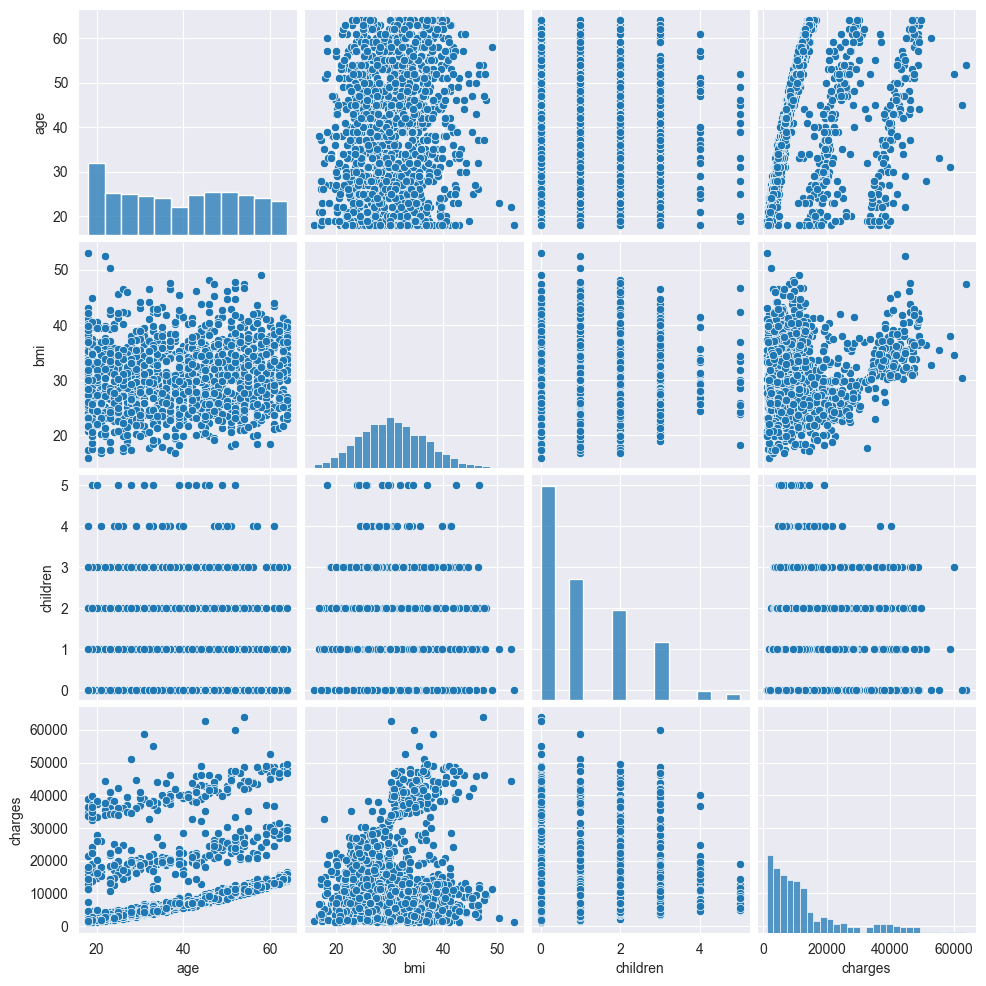

In [73]:
sns.pairplot(df)

<AxesSubplot: xlabel='age', ylabel='charges'>

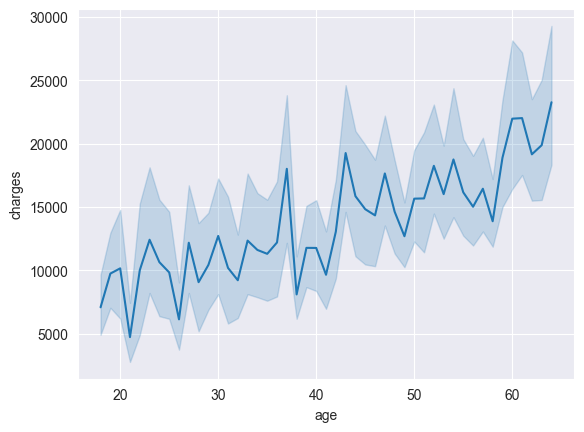

In [74]:
sns.lineplot(df[['age', 'charges']], x = 'age', y= 'charges')

<AxesSubplot: xlabel='sex', ylabel='charges'>

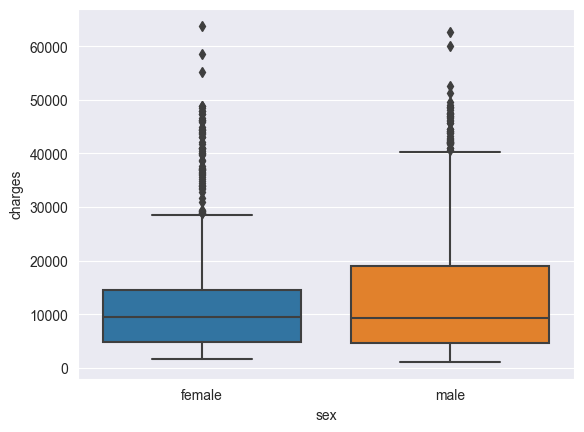

In [75]:
sns.boxplot(df, x = 'sex', y = 'charges')

<AxesSubplot: xlabel='age', ylabel='charges'>

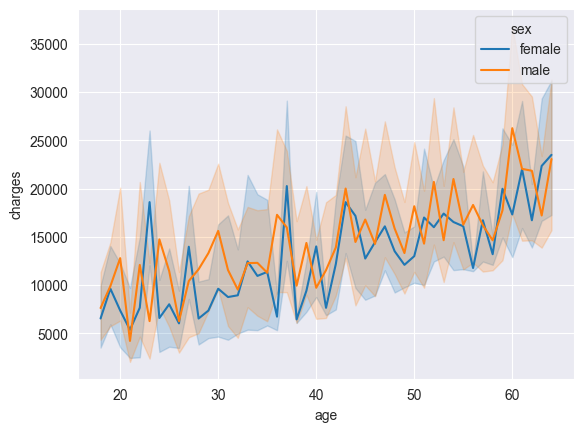

In [76]:
sns.lineplot(df, x = 'age', y= 'charges', hue = 'sex')

<AxesSubplot: xlabel='children', ylabel='charges'>

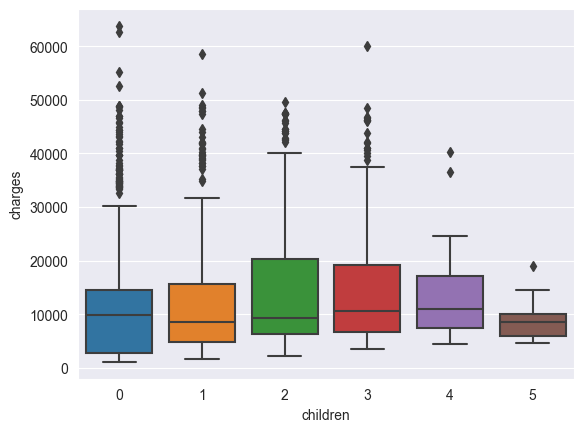

In [77]:
sns.boxplot(df, y= 'charges', x = 'children')

<AxesSubplot: xlabel='region', ylabel='charges'>

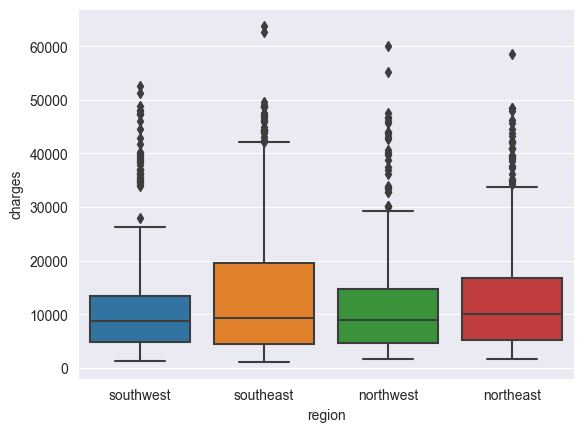

In [78]:
sns.boxplot(df, y= 'charges', x = 'region')

<AxesSubplot: xlabel='smoker', ylabel='charges'>

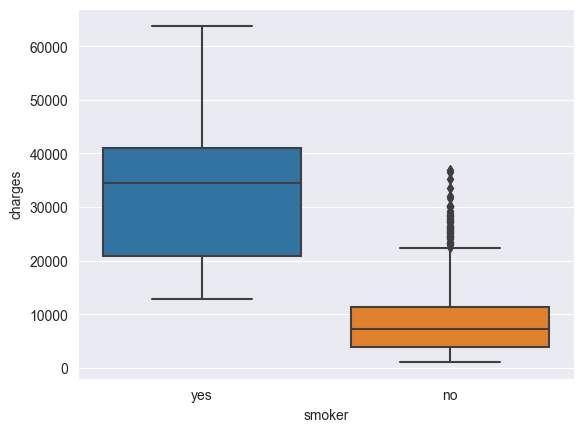

In [79]:
sns.boxplot(df, y= 'charges', x = 'smoker')

/var/folders/tf/5c5cm4z11mvb4z72rkp1jvxw0000gn/T/ipykernel_22320/4014866372.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True)


<AxesSubplot: >

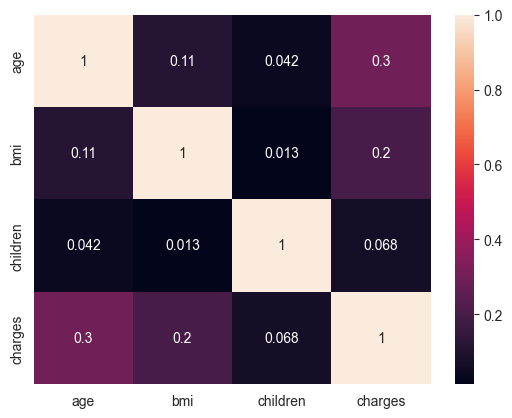

In [80]:
sns.heatmap(df.corr(), annot= True)

## Análise do impacto do fumo

In [81]:
df_fumante_true = df.loc[df.smoker == 'yes']
df_fumante_false = df.loc[df.smoker == 'no']

/var/folders/tf/5c5cm4z11mvb4z72rkp1jvxw0000gn/T/ipykernel_22320/1986248362.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_fumante_true.corr(), annot= True)


<AxesSubplot: >

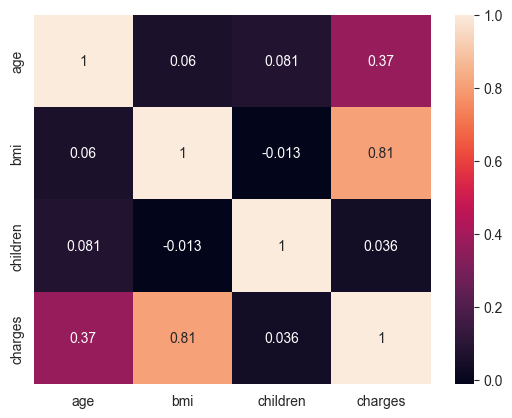

In [82]:
sns.heatmap(df_fumante_true.corr(), annot= True)

/var/folders/tf/5c5cm4z11mvb4z72rkp1jvxw0000gn/T/ipykernel_22320/4248078798.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_fumante_false.corr(), annot= True)


<AxesSubplot: >

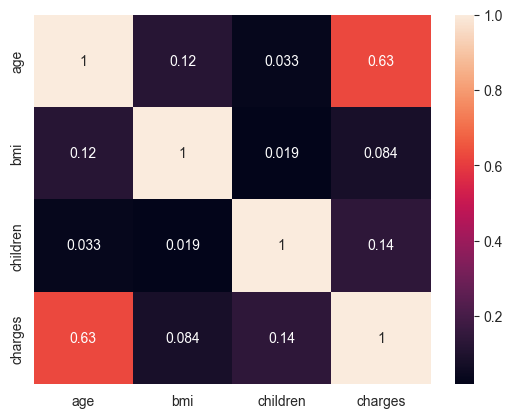

In [83]:
sns.heatmap(df_fumante_false.corr(), annot= True)

# Criação do modelo OLS - 1

In [84]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [85]:
X =  sm.add_constant(df_fumante_true[['age', 'bmi', 'children']])
y = df_fumante_true['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

y_train = np.array(y_train, dtype = 'float')
X_train = np.array(X_train)

mod = sm.OLS(y_train, X_train)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     178.1
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.45e-54
Time:                        11:20:28   Log-Likelihood:                -1933.9
No. Observations:                 191   AIC:                             3876.
Df Residuals:                     187   BIC:                             3889.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.22e+04   2446.147     -9.075      0.000    -2.7e+04   -1.74e+04
x1           279.6958     30.846      9.067      0.000     218.845     340.547
x2          1424.0317     68.497     20.790      0.000    1288.905    1559.158
x3           128.5436    392.847      0.327      0.744    -646.438     903.526
==============================================================================
Omnibus:                       46.673   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.696
Skew:                           1.101   Prob(JB):                     1.84e-23
Kurtosis:                       5.883   Cond. No.                         282.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
X =  sm.add_constant(df_fumante_false[['age', 'bmi', 'children']])
y = df_fumante_false['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

y_train = np.array(y_train, dtype = 'float')
X_train = np.array(X_train)

mod = sm.OLS(y_train, X_train)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     166.5
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.85e-82
Time:                        11:20:28   Log-Likelihood:                -7363.6
No. Observations:                 744   AIC:                         1.474e+04
Df Residuals:                     740   BIC:                         1.475e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2860.2636    991.322     -2.885      0.004   -4806.402    -914.126
x1           269.4101     12.445     21.648      0.000     244.979     293.841
x2             4.0194     29.545      0.136      0.892     -53.982      62.021
x3           667.0720    154.365      4.321      0.000     364.026     970.118
==============================================================================
Omnibus:                      462.369   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2906.851
Skew:                           2.952   Prob(JB):                         0.00
Kurtosis:                      10.675   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Indexação de atributos

In [95]:
df.region = df.region.replace(to_replace = dict(zip(df.region.unique(), []))

<AxesSubplot: xlabel='region', ylabel='charges'>

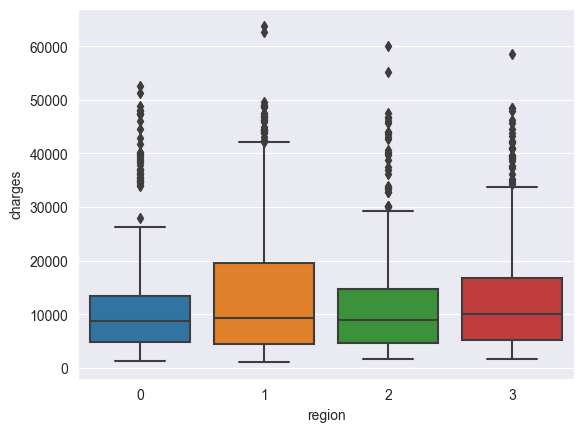

In [97]:
sns.boxplot(df, x = 'region', y = 'charges')

In [116]:
df.groupby('region').quantile(0.75).sort_values('charges')

,age,sex,bmi,children,smoker,charges
region,,,,,,
0,51.0,1.0,34.60000,2.0,1.0,13462.5200
1,51.0,1.0,32.77500,2.0,1.0,14711.7438
2,51.0,1.0,32.89375,2.0,1.0,16687.3641
3,51.0,1.0,37.81250,2.0,1.0,19526.2869


In [106]:
df.region = df.region.replace(to_replace = dict(zip(df.region.unique(), [0,3,1,2])))

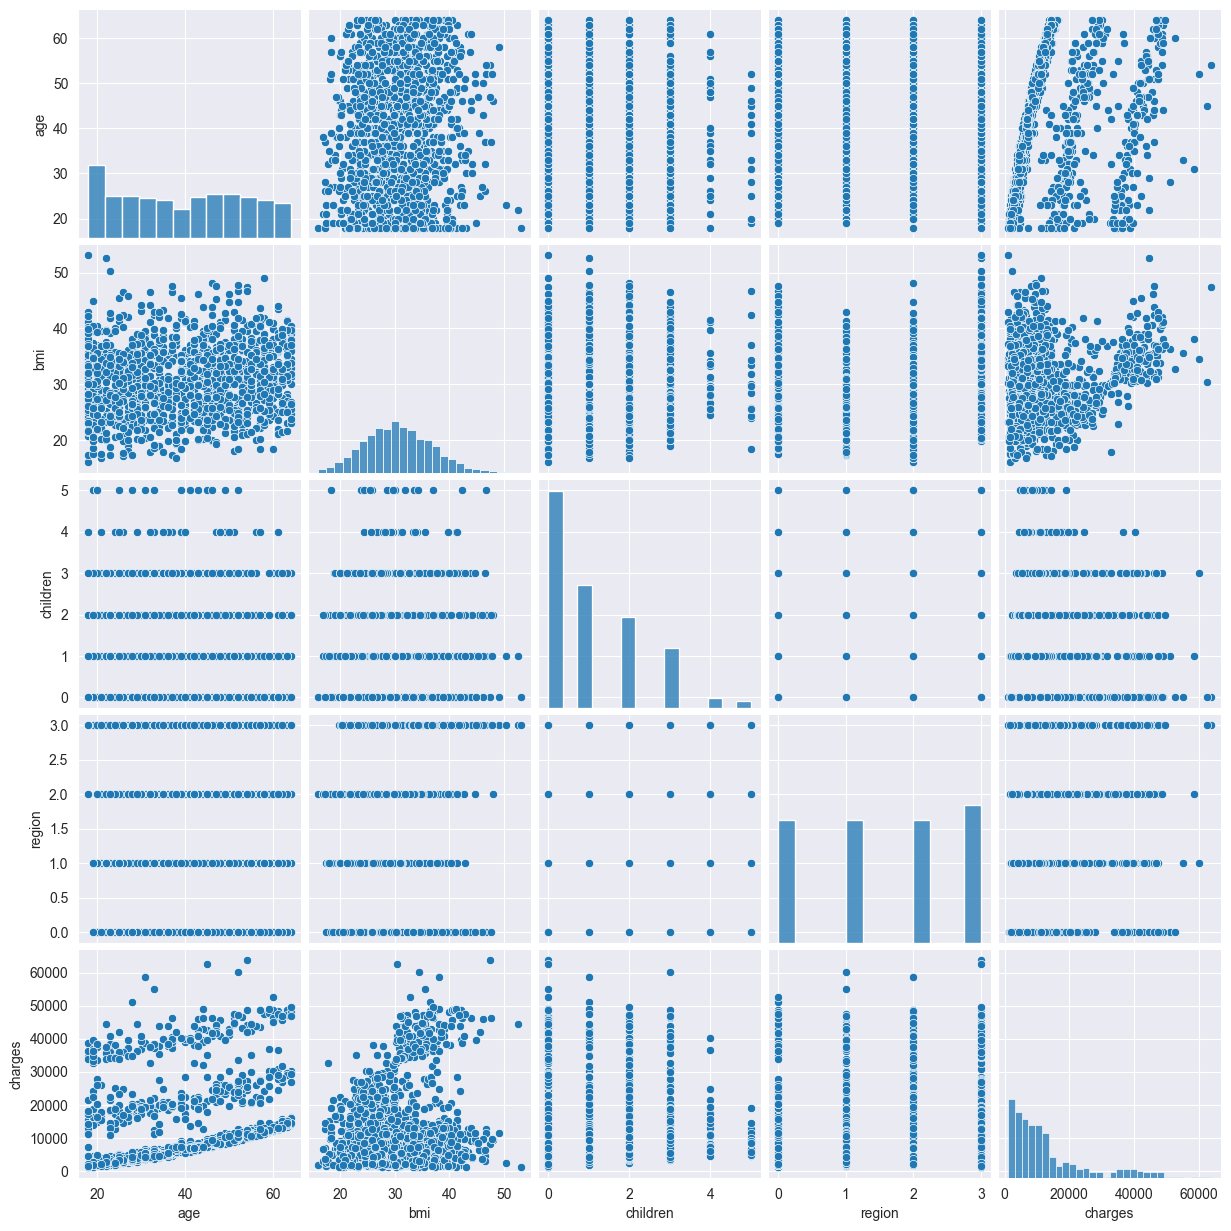

In [107]:
sns.pairplot(df)

<AxesSubplot: xlabel='smoker', ylabel='charges'>

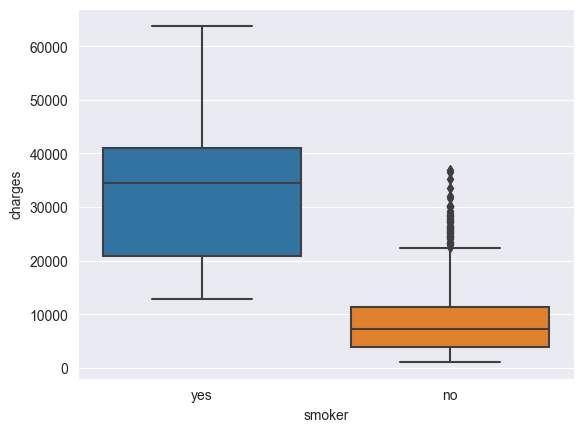

In [104]:
sns.boxplot(df, x = 'smoker', y = 'charges')

In [108]:
df.smoker = df.smoker.replace(to_replace = dict(zip(df.smoker.unique(), [0,1])))

In [109]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,0,0,16884.92400
1,18,male,33.770,1,1,3,1725.55230
2,28,male,33.000,3,1,3,4449.46200
3,33,male,22.705,0,1,1,21984.47061
4,32,male,28.880,0,1,1,3866.85520


In [110]:
df.sex = df.sex.replace(to_replace = dict(zip(df.sex.unique(), [0,1])))

In [111]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,3,1725.55230
2,28,1,33.000,3,1,3,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520


<AxesSubplot: >

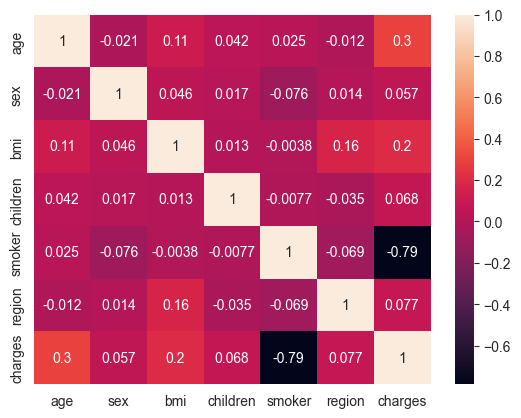

In [447]:
sns.heatmap(df.corr(), annot = True)

# Criação do modelo OLS - 2

OLS Regression Results<br>
Dep. Variable:	y	R-squared:	0.736<br>
Model:	OLS	Adj. R-squared:	0.735<br>
Method:	Least Squares	F-statistic:	432.6<br>
Date:	Thu, 01 Dec 2022	Prob (F-statistic):	6.21e-265<br>

In [118]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

$R^2$ - ['age', 'smoker', 'bmi']: 77.7, 5680 <br>
$R^2$ - ['age', 'sex', 'children', 'smoker', 'region']: 73.4, 6174 <br>
$R^2$ - ['age', 'sex', 'children', 'smoker', 'region', 'bmi']: 73.6, 5691 <br>

In [384]:
X =  sm.add_constant(df[['age', 'smoker', 'bmi']])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

mod = sm.OLS(y_train, X_train, hasconst = True)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     856.0
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          3.43e-267
Time:                        13:09:05   Log-Likelihood:                -9510.3
No. Observations:                 936   AIC:                         1.903e+04
Df Residuals:                     932   BIC:                         1.905e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.363e+04   1208.729     11.279      0.000    1.13e+04     1.6e+04
age          261.2572     14.676     17.802      0.000     232.455     290.059
smoker     -2.399e+04    518.093    -46.311      0.000    -2.5e+04    -2.3e+04
bmi          281.0699     33.265      8.449      0.000     215.786     346.353
==============================================================================
Omnibus:                      217.990   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.204
Skew:                           1.254   Prob(JB):                    5.38e-110
Kurtosis:                       5.572   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression

In [385]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [392]:
from statsmodels.regression.linear_model import PredictionResults

In [386]:
y_pred_ols = res.predict(X_test)

In [397]:
predictions = res.get_prediction(X_test)
predictions.conf_int(alpha = 0.05)

(402, 2)

In [428]:
pred_conf = pd.DataFrame(predictions.conf_int(alpha = 0.05))
pred_conf['y_test'] = y_test.reset_index(drop=True)

<AxesSubplot: >

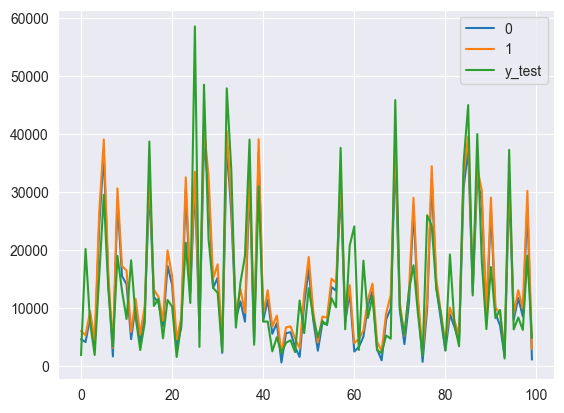

In [429]:
pred_conf[0:100].plot()

In [430]:
print( "RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred_ols ) ))
#R-squared value
print( "R-squared: ",r2_score( y_test, y_pred_ols ) )

RMSE:  5680.3244658661015
R-squared:  0.7777782410843168


In [431]:
lr = LinearRegression()

lr.fit( X_train , y_train)


LinearRegression()

In [432]:
#get intercept
print( lr.intercept_ )
#get slope
print( lr.coef_ )

13633.20433162483
[     0.            261.25718032 -23993.53317353    281.06986243]


In [433]:
y_pred_lr = lr.predict(X_test)

In [434]:
print( "RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred_lr ) ))
#R-squared value
print( "R-squared: ",r2_score( y_test, y_pred_lr ) )

RMSE:  5680.324465866109
R-squared:  0.7777782410843161


<AxesSubplot: ylabel='charges'>

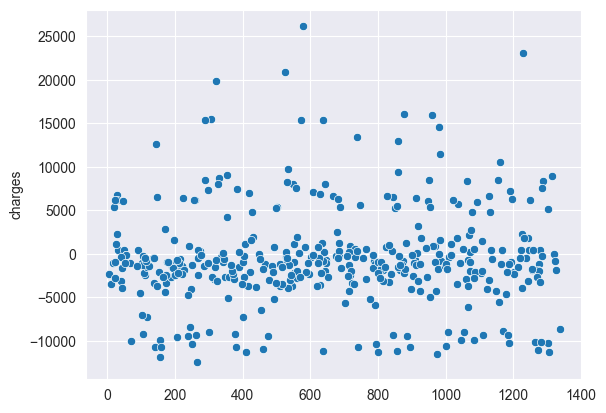

In [435]:
y_resid = y_test - y_pred_lr
y_resid_2 = (y_test - y_pred_lr) **2
sns.scatterplot(y_resid)

<AxesSubplot: ylabel='charges'>

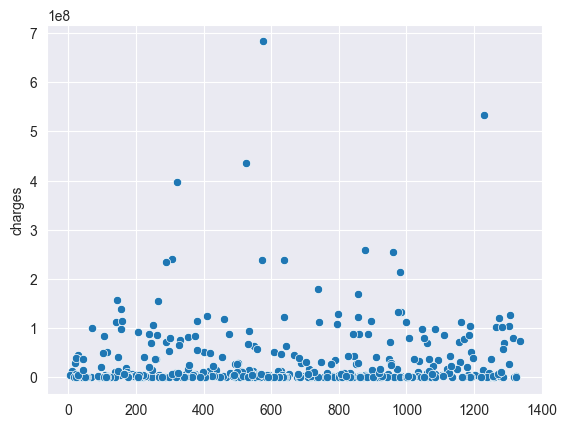

In [436]:
sns.scatterplot(y_resid_2)

<AxesSubplot: ylabel='charges'>

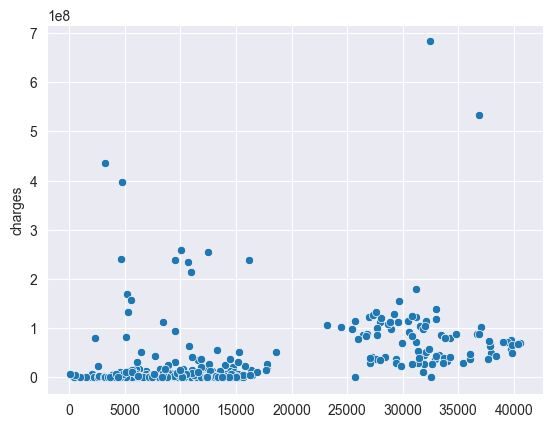

In [437]:
sns.scatterplot(x = y_pred_lr , y = y_resid_2)

In [438]:
df_resid = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred_lr, 'y_resid':y_resid, 'y_resid_2':y_resid_2})

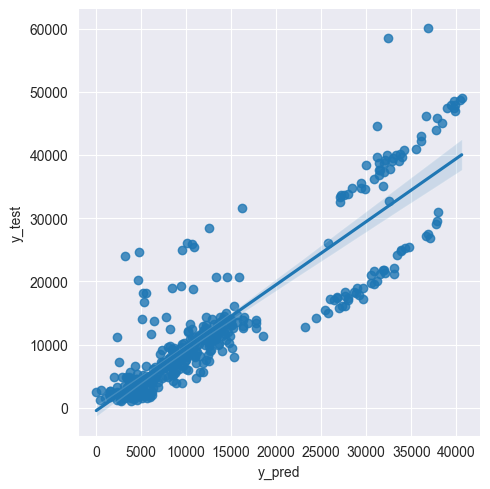

In [439]:
sns.lmplot(data = df_resid, y = 'y_test' , x = 'y_pred')

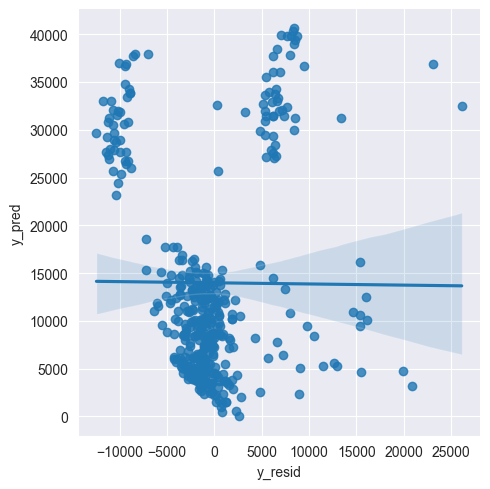

In [440]:
sns.lmplot(data = df_resid, y = 'y_pred' , x = 'y_resid')

<AxesSubplot: xlabel='y_resid', ylabel='Count'>

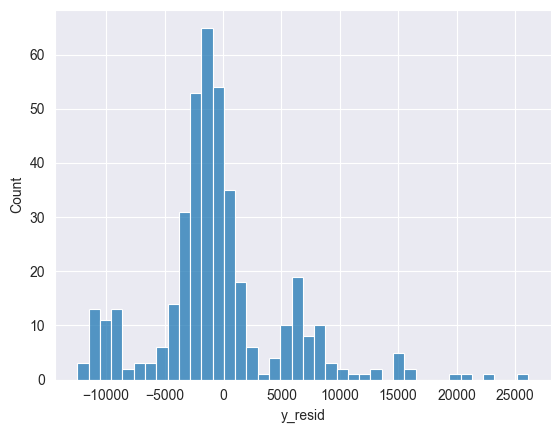

In [441]:
sns.histplot(df_resid['y_resid'])

<AxesSubplot: xlabel='y_resid_2', ylabel='Count'>

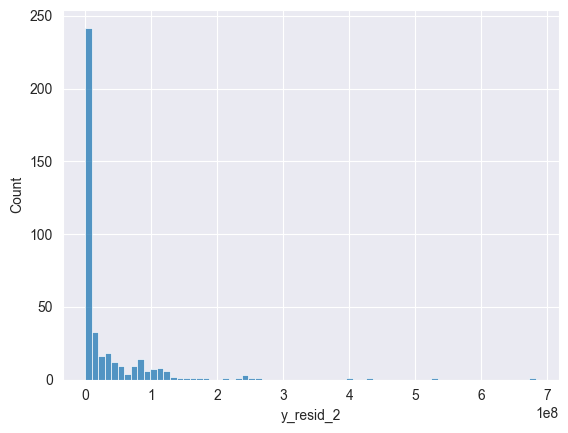

In [442]:
sns.histplot(df_resid['y_resid_2'])

In [443]:
df_resid.columns

Index(['y_test', 'y_pred', 'y_resid', 'y_resid_2'], dtype='object')

<AxesSubplot: >

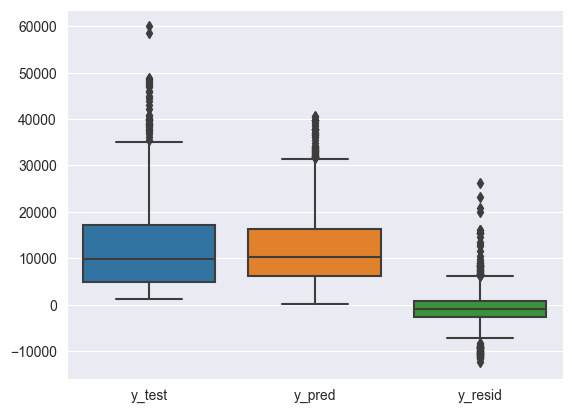

In [444]:
sns.boxplot(df_resid[['y_test', 'y_pred', 'y_resid']])

In [445]:
from statsmodels.api import qqplot

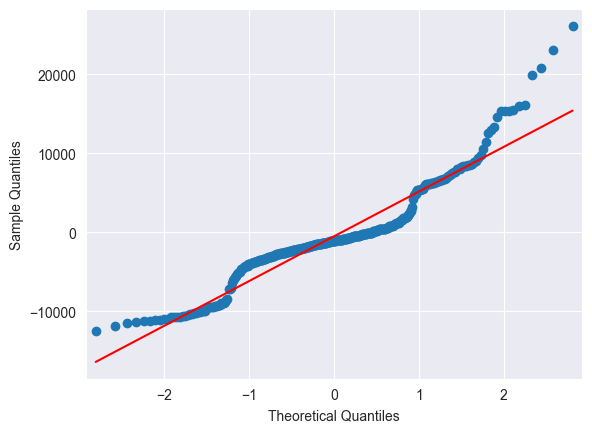

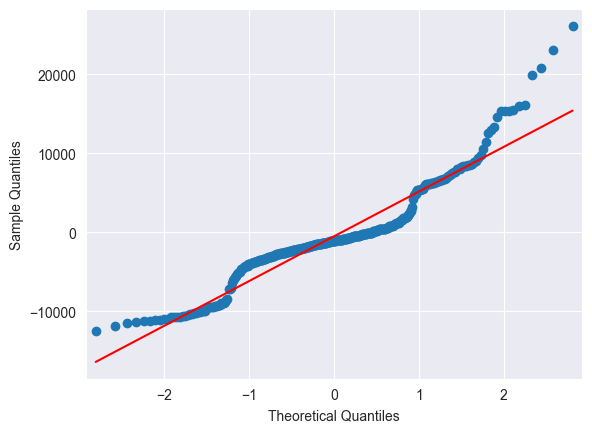

In [446]:
qqplot(y_resid, line='s')